<a href="https://colab.research.google.com/github/Gail529/chess_ML/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.3MB/s 


In [51]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)


  

In [32]:
data=pd.read_csv('/content/games.csv',usecols=['turns','winner','white_rating','black_rating','opening_ply','opening_eco','increment_code'])


In [33]:
data.head()

,turns,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,13,white,15+2,1500,1191,D10,5
1,16,black,5+10,1322,1261,B00,4
2,61,white,5+10,1496,1500,C20,3
3,61,white,20+0,1439,1454,D02,3
4,95,white,30+3,1523,1469,C41,5


In [34]:
data = data[data['winner'] != 'draw']

# Feature Engineering
feature generation

In [35]:
#creating a new feature
data['rating_diff'] = data['white_rating']-data['black_rating']
data.columns


Index(['turns', 'winner', 'increment_code', 'white_rating', 'black_rating',
       'opening_eco', 'opening_ply', 'rating_diff'],
      dtype='object')

Dropping null values


In [37]:
data.dropna(axis=0,inplace=True)
data.isnull().sum().sum()


0

Feature Scaling

In [38]:
#standardisation
from sklearn import preprocessing 
cols=['turns','white_rating', 'black_rating', 'opening_ply','rating_diff']
cols_to_scale=data[cols]
Standardisation = preprocessing.StandardScaler()  
scaled_cols= Standardisation.fit_transform(cols_to_scale) 
print ("\nStandardised columns : \n", scaled_cols) 
data[cols]=scaled_cols



Standardised columns : 
 [[-1.42958401 -0.3231754  -1.36220241  0.07005173  1.20298556]
 [-1.3367311  -0.93709099 -1.12093863 -0.28929014  0.21354943]
 [ 0.05606259 -0.33697125 -0.29719515 -0.648632   -0.04577859]
 ...
 [-0.74866265 -1.29233428 -1.03477299 -0.648632   -0.29712729]
 [ 1.5417092  -0.80603036 -1.2381239  -0.28929014  0.50080508]
 [ 0.5822291  -1.23715086 -0.85210184 -0.648632   -0.44474478]]


In [17]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(data)

# transform training data
data = norm.transform(data)



# Encoding categorical  variables

Using binary encoder

In [41]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])

#for categorical_cols with high cardinality
#binary encoding
encoder= ce.BinaryEncoder(cols=['opening_eco','increment_code'])
data_encoded=encoder.fit_transform(data) 
data=data_encoded

['increment_code', 'opening_eco']


Using frequency encoding

In [ ]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])


#frequency encoding for the categorical_cols with high cardinality
fe1= data.groupby('opening_eco').size()/len(data)
data.loc[:,'opening_encode']=data['opening_eco'].map(fe1)
fe_data=data.drop(columns=['opening_eco'],axis=1)


fe2= data.groupby('increment_code').size()/len(data)
data.loc[:,'incr_encode']=data['increment_code'].map(fe2)
fe_data=fe_data.drop(columns=['increment_code'],axis=1)



['increment_code', 'opening_eco']


# Feature Importance using RANDOM FOREST




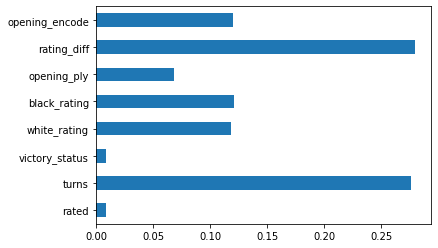

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')


In [42]:
X = data.drop(columns=['winner'], axis=1)
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Logistic Regression


In [47]:

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.654258 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [48]:
lr = LogisticRegression(C= 0.01, penalty='l2', solver='newton-cg')
# fit the model with data
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Test Set:",lr.score(X_test, y_test))
print("Training Set:",lr.score(X_train, y_train))
print(classification_report(y_test,y_pred))

Test Set: 0.6590790162218734
Training Set: 0.6558288630119063
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1832
           1       0.66      0.71      0.68      1990

    accuracy                           0.66      3822
   macro avg       0.66      0.66      0.66      3822
weighted avg       0.66      0.66      0.66      3822



In [66]:
#clf =DecisionTreeClassifier().fit(X_train, y_train)

# Creating Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=13,criterion='gini')
# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dt.predict(X_test)
print("Accuracy:",dt.score(X_test, y_test))
print("Accuracy:",dt.score(X_train, y_train))
print(classification_report(y_test,y_pred))


Accuracy: 0.6664050235478807
Accuracy: 0.7362946486981552
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1832
           1       0.68      0.67      0.67      1990

    accuracy                           0.67      3822
   macro avg       0.67      0.67      0.67      3822
weighted avg       0.67      0.67      0.67      3822



In [67]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",dt.score(X_test, y_test))
print("Accuracy:",dt.score(X_train, y_train))
print(classification_report(y_test,y_pred))



Accuracy: 0.6664050235478807
Accuracy: 0.7362946486981552
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1832
           1       0.73      0.70      0.72      1990

    accuracy                           0.71      3822
   macro avg       0.71      0.71      0.71      3822
weighted avg       0.71      0.71      0.71      3822

